### INF 510 Fall 2019 Final Project Submission

1.	**The names of team member(s)**:

    YiTing Lin (USCID: 7020250658)

2.	**How to run your code (what command-line switches they are, what happens when you invoke the code, etc.)**

    This project requires the following packages:
    - pandas, numpy, seaborn, requests and beautifulsoup
    
    To run this project, make sure the above packages are installed, and then simply clone the repo at http://www.github.com/jeremyabramson/inf510_project and execute this notebook


3.	**Any major “gotchas” to the code (i.e. things that don’t work, go slowly, could be improved, etc.)**
    
    The script (script.py, script2.py, script3.py) takes awhile to capture the data. However, you could see the name of the related player/agent data, processed by the script, presenting on the current line. Because I dynamically print the name of  player/agent. 
    
    I've tried to make the API run fast, however, the API don't allowed to be request in a short time. Therefore, there are some designed time delay in the developed script.
    
    There are tons of Null in the database, because the information from the API and the website aren't able to provide complete information (i.e., Dennis Schroeder's information). If the provided information from the API could be more thorough, then the derive information from the database could be improved.
    
    The website (https://hoopshype.com/) doesn't contain part of the player's agent.
    

4.  **Anything else you feel is relevant to the grading of your project your project.**

    In the script.py, sometimes the line 22 (while n < 137:) gets Index Error, had to change the number there (i.e., 137, 138)

5. **What did you set out to study?  (i.e. what was the point of your project?  This should be close to your Milestone 1 assignment, but if you switched gears or changed things, note it here.)**
    
    Who has been out of the NBA, but still getting paid by NBA?
    Who got low efficiency, but got paid a lot and who are their agent?
    Is there any relationship between average points/assists/blocks/rebounds and salary?
    Which team had the highest/lowest efficiency and the corresponding agents from the players?

6. **What did you Discover/what were your conclusions (i.e. what were your findings?  Were your original assumptions confirmed, etc.?)**

    I hate KCP, who got paid tons of money, because of low IQ basketball plays for the last two years.
    Therefore, I would like to take a close view on whether he's in the top low efficiency performance NBA players.

7. **What difficulties did you have in completing the project?**  

    The API didn't provide the complete information (i.e., missing tons of players).

8. **What skills did you wish you had while you were doing the project?**

    I wish I can find a way to breakthrough the restricted time request from the website to not spending tons of time requesting information from the API.

9. **What would you do “next” to expand or augment the project?**

Player's stats +/- (whether team are increasing/decreasing their lead during the players on court performance) are also important! However, the API basketballdontlie didn't provide the +/- stats.

In [23]:
import sqlite3
import pandas as pd

db_control = sqlite3.connect('nba.db')

df = pd.read_sql_query("SELECT p.name, p.salary, p.efficiency, p.team, a.name FROM Players as p JOIN Agents as a WHERE games_played > 10 AND a.id = p.agents_id ORDER BY efficiency DESC ", db_control)
print(type(df))
df.head(15)



<class 'pandas.core.frame.DataFrame'>


,name,salary,efficiency,team,name
0,Kyrie Irving,31742000,64.541667,Brooklyn Nets,Joe Branch
1,Nikola Vucevic,28000000,51.803493,Orlando Magic,Bill Duffy
2,Luka Doncic,7683360,48.589778,Dallas Mavericks,Bill Duffy
3,Kyle Lowry,33296296,46.899843,Toronto Raptors,Mark Bartelstein
4,Giannis Antetokounmpo,25842697,46.223742,Milwaukee Bucks,Jeff Austin
5,Anthony Davis,27093019,44.371663,Los Angeles Lakers,Rich Paul
6,LeBron James,37436858,41.210496,Los Angeles Lakers,Rich Paul
7,Andre Drummond,27093018,41.114975,Detroit Pistons,Jeff Schwartz
8,Domantas Sabonis,3529554,39.332913,Indiana Pacers,Jason Ranne
9,Bradley Beal,27093018,38.182409,Washington Wizards,Reggie Brown


This data provide the top 15 efficient players in the NBA with their corresponding agent. 

However, you can see ball hog like Kyrie Irving and James Harden are at the top 2. In other word, they are statically efficient. Houston Rocket's manager Darl Morey did prove his point that James Harden is the most efficient player of all time. 

Daryl Morey: 'Just Factual' James Harden a Better Scorer Than Michael Jordan.

However, these stats don't provide information related to win/share, which I thought are much more important team goal rather than stats. Because NBA is all about win or go home. People appreciate players that helps team instead of stats builder (i.e., recent 2017 NBA MVP).

In [29]:
df = pd.read_sql_query("SELECT AVG(salary) FROM Players", db_control)
print(type(df))
df.head(30)

<class 'pandas.core.frame.DataFrame'>


,AVG(salary)
0,6.998587e+06


In [30]:
df = pd.read_sql_query("SELECT p.name, p.salary, p.efficiency, p.team, a.name FROM Players as p JOIN Agents as a WHERE games_played > 10 AND a.id = p.agents_id AND salary > (6.998587e+06) ORDER BY efficiency ASC ", db_control)
print(type(df))
df.head(30)

<class 'pandas.core.frame.DataFrame'>


,name,salary,efficiency,team,name
0,Chandler Parsons,25102512,0.156600,Atlanta Hawks,James Dunleavy
1,Courtney Lee,12759670,0.158478,Dallas Mavericks,James Dunleavy
2,Deandre Ayton,9562920,0.235300,Phoenix Suns,Nima Namakian
3,James Johnson,15349400,0.237289,Miami Heat,Andy Shiffman
4,Brandon Knight,15643750,0.242413,Cleveland Cavaliers,Darren 'Mats' Matsubara
5,DeMarre Carroll,7000000,0.381287,San Antonio Spurs,Mark Bartelstein
6,Dante Exum,9600000,0.697000,Utah Jazz,Brandon Rosenthal
7,Ian Mahinmi,15450051,1.338491,Washington Wizards,Bouna Ndiaye
8,Wayne Ellington,8000000,1.449382,New York Knicks,Mark Bartelstein
9,Matthew Dellavedova,9607500,2.181300,Cleveland Cavaliers,Bill Duffy


This table is the top 30 NBA players that got paid higher than the average salary of the NBA. 
As I expected that KCP (Kentavious Caldwell-Pope), who had been pain a lot as a Lakers player, are on the the list.

In [10]:
# Preparing our simulation of coin flips with variables
I = 50 #The number of series to be simulated.
n = 100 #The number of trials per series.

def run_simulation(f):
    c = np.zeros((n, I)) #Instantiates an ndarray object to store the simulation results.
    c[0] = 100 #Initializes the starting capital with 100.
    for i in range(I): #Outer loop for the series simulations.
        for t in range(1,n): #Inner loop for the series itself.
            o = np.random.binomial(1, p) #Simulates the tossing of a coin.
            if o > 0: #If 1, i.e., heads …
                c[t, i] = (1+f) * c[t-1,i] #… then add the win to the capital.
            else: #If 0, i.e., tails …
                c[t, i] = (1-f) * c[t-1,i] #… then subtract the loss from the capital.
    return c

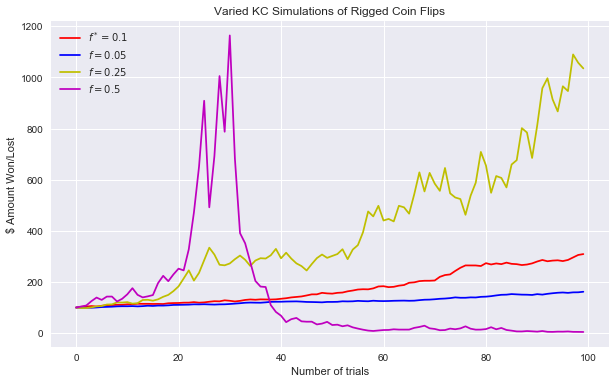

In [14]:
c_1 = run_simulation(f) # runs the simulation with f = .1 as per Kelly Criterion
c_2 = run_simulation(0.05) #Simulation with f = 0.05.
c_3 = run_simulation(0.25) #Simulation with f = 0.25.
c_4 = run_simulation(0.5) #Simulation with f = 0.5.
plt.figure(figsize=(10, 6))
plt.plot(c_1.mean(axis=1), 'r', label='$f^*=0.1$')
plt.plot(c_2.mean(axis=1), 'b', label='$f=0.05$')
plt.plot(c_3.mean(axis=1), 'y', label='$f=0.25$')
plt.plot(c_4.mean(axis=1), 'm', label='$f=0.5$')
plt.legend(loc=0);
plt.title('Varied KC Simulations of Rigged Coin Flips');
plt.xlabel('Number of trials');
plt.ylabel('$ Amount Won/Lost');

If you run this a number of times, you'll see how a 50% bet size makes you go bust...even with such a biased coin!  That's nuts!

But the Kelly Optimal bet size (10%) has a positive expected value, with much lower variance!

Okay, but I wanted to see if I could use offensive and defensive efficiency to project NBA games...are those metrics stable year over year?

In [15]:
# Data from nbastuffer.com; may differ from basketball-reference data
# Read in the data

# NOTE: This should be in the /data directory of my github repo!
adv_df = pd.read_csv('nba_adv.csv')

In [16]:
# Take a look at the columns
adv_df.head()

,RANK,TEAM,CONF,DIVISION,GP,PTS/GM,aPTS/GM,PTS DIFF,PACE,OEFF_2017,...,SAR,CONS,A4F,W,L,WIN%,eWIN%,pWIN%,ACH,STRK
0,1,Atlanta,East,Southeast,82,103.4,108.8,-5.4,98.3,105.0,...,-5.26,13.4,-0.037,24,58,0.293,0.338,0.322,-0.045,L 1
1,2,Boston,East,Atlantic,82,104.0,100.4,3.6,96.0,107.6,...,2.82,11.5,0.033,55,27,0.671,0.627,0.619,0.044,W 1
2,3,Brooklyn,East,Atlantic,82,106.6,110.3,-3.7,98.9,106.9,...,-3.40,12.2,0.021,28,54,0.341,0.381,0.378,-0.040,L 1
3,4,Charlotte,East,Southeast,82,108.2,108.0,0.2,98.4,109.4,...,0.31,12.6,-0.041,36,46,0.439,0.510,0.507,-0.071,W 1
4,5,Chicago,East,Central,82,102.9,110.0,-7.1,98.3,103.8,...,-6.54,14.4,-0.061,27,55,0.329,0.311,0.266,0.018,L 4


In [17]:
# The columns we want:
adv_df[['TEAM', 'OEFF_2017', 'OEFF_2018']]

,TEAM,OEFF_2017,OEFF_2018
0,Atlanta,105.0,108.2
1,Boston,107.6,112.3
2,Brooklyn,106.9,109.6
3,Charlotte,109.4,111.4
4,Chicago,103.8,104.8
5,Cleveland,112.9,107.7
6,Dallas,106.4,109.4
7,Denver,112.4,113.0
8,Detroit,107.2,109.0
9,Golden State,113.7,116.0


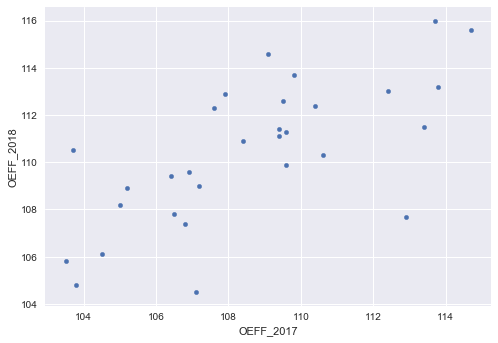

In [18]:
# Is offensive efficiency stable year over year?
adv_df.set_index('TEAM').plot.scatter(x='OEFF_2017', y='OEFF_2018')

Hmmm.  Looks like there may be a linear relationship there.  A line would help...

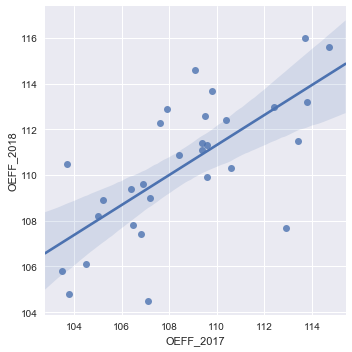

In [20]:
# Let's get the regression line in there
sns.lmplot(x='OEFF_2017', y='OEFF_2018', data=adv_df, fit_reg=True) 

Hmmm.  Still not convinced.  Let's look at $R^2$

In [21]:
# Let's look at R^2
adv_df[['OEFF_2017', 'OEFF_2018']].corr()

,OEFF_2017,OEFF_2018
OEFF_2017,1.000000,0.694138
OEFF_2018,0.694138,1.000000


That's not bad!  So maybe offensive efficiency is predictive year over year!  But what if there are leaguewide trends we're not considering?

Text(0, 0.5, '2018 Offensive Efficiency')

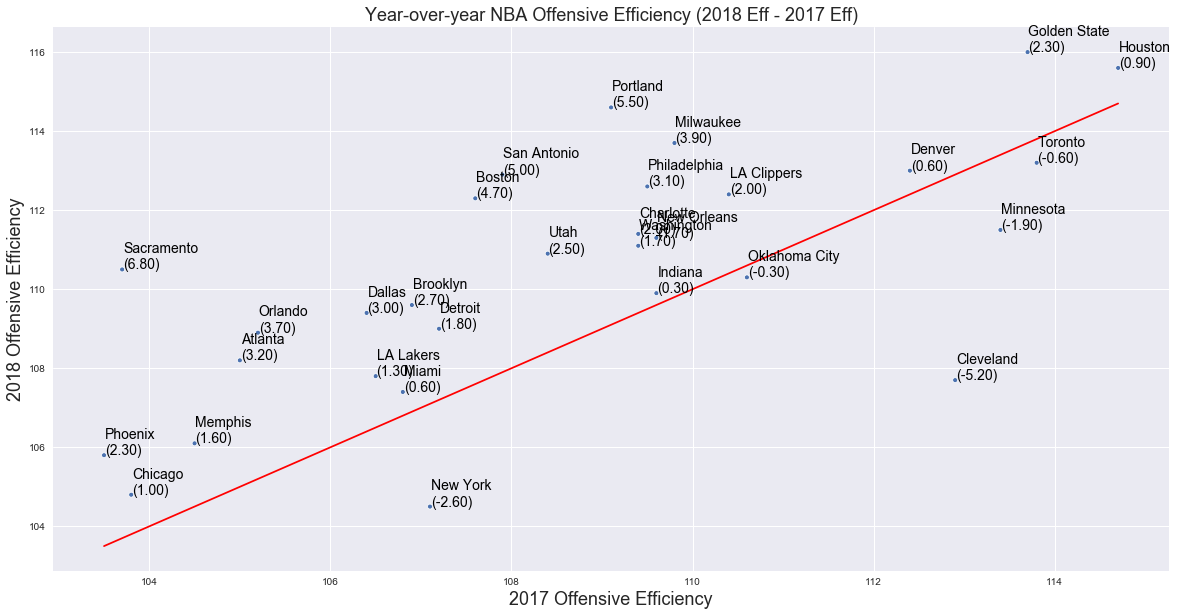

In [28]:
plt.figure(figsize=(20,10))
p1 = sns.scatterplot('OEFF_2017', # Horizontal axis
       'OEFF_2018', # Vertical axis
       data=adv_df, # Data source
       size = 12,
       legend=False)  

for line in range(0,adv_df.shape[0]):
     p1.text(adv_df.OEFF_2017[line]+0.01, adv_df.OEFF_2018[line], 
     f"{adv_df.TEAM[line]}\n({adv_df.OEFF_2018[line]-adv_df.OEFF_2017[line]:.2f})", horizontalalignment='left', 
     size='14', color='black', weight='normal')

X_plot = np.linspace(adv_df.OEFF_2017.min(), adv_df.OEFF_2017.max())
Y_plot = np.linspace(adv_df.OEFF_2017.min(), adv_df.OEFF_2017.max())
plt.plot(X_plot, Y_plot, color='r')
        
plt.title('Year-over-year NBA Offensive Efficiency (2018 Eff - 2017 Eff)', fontsize='18')
# Set x-axis label
plt.xlabel('2017 Offensive Efficiency', fontsize='18')
# Set y-axis label
plt.ylabel('2018 Offensive Efficiency', fontsize='18')

Yikes!  It looks like the entire league is getting better offensively.  So maybe it's not that helpful?  If I was to continue this project, I'd want to see if efficiency metrics could be used to pick NBA winners via the Vegas moneyline.  I'd need daily lines data for this.  Then, I could use the optimal Kelly Betting strategy above to place optimal bet sizes based on my implied edge versus the line.